<div style="border:solid green 3px; padding: 20px">

<b>Привет!</b>

Меня зовут Сороколетов Илья и я буду проверять твой проект. 

Предлагаю общаться на «**ты**», но если тебе будет комфортнее общаться на «**вы**», то сообщи об этом в комментариях)


Для твоего удобства, я буду выделять свои комментарии следующим образом:

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> Самые важные замечания. Они указывают на ключевые моменты, которые влияют на конечный результат проекта. </div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> Советы или замечания, которые помогут сделать твою работу лучше, но необязательны к выполнению.

</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> Так я выделяю все остальные комментарии.</div>


Пометками <b>v1-v2-v3-...</b> я буду отмечать версию проверки. Так ты сможешь быстро найти мои новые комментарии.

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения, например вот так:
    
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
</div>

<b>Пожалуйста, не перемещай, не изменяй и не удаляй мои комментарии.</b> Если ты оставляешь свои комментарии, то делай это под моими, чтобы сообщения были расположены в хронологическом порядке. Всё это поможет выполнить повторную проверку твоего проекта быстрее. 

Перед отправкой работы я рекомендую нажимать Kernel -> Restart & Run All. Это перезапустит ядро и по очереди выполнит все ячейки. Так ты сможешь проверить, что всё работает корректно. Кнопка Kernel находится в панели сверху

Обязательно задавай вопросы если они возникнут, а я перехожу к проверке)

P.S. На всякий случай, я оставлю пустой шаблон для твоих комментариев ниже. Кликни два раза на мой комментарий, скопируй последние четыре строчки кода и вставляй их в пустую ячейку там, где ты хочешь оставить комментарий. Не забудь только перед этим сменить тип ячейки на Markdown. Быстро это можно сделать так: кликнуть на ячейку - нажать ESC - нажать M. 
    
    
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>У меня главный вопрос по аномалиям. Как вот понять, 763млн за квартиру это выброс или нет? как их правильно убирать? ведь может быть и квартира за 763млн и 900 квадратных метров площадью. их отсеивать исходя от среднего и медианного значения? Объясни, пожалуйста. 
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Оставлю коммент в части проекта, где ты убираешь аномалии)
</div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
pd.set_option('display.max_columns', None)
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

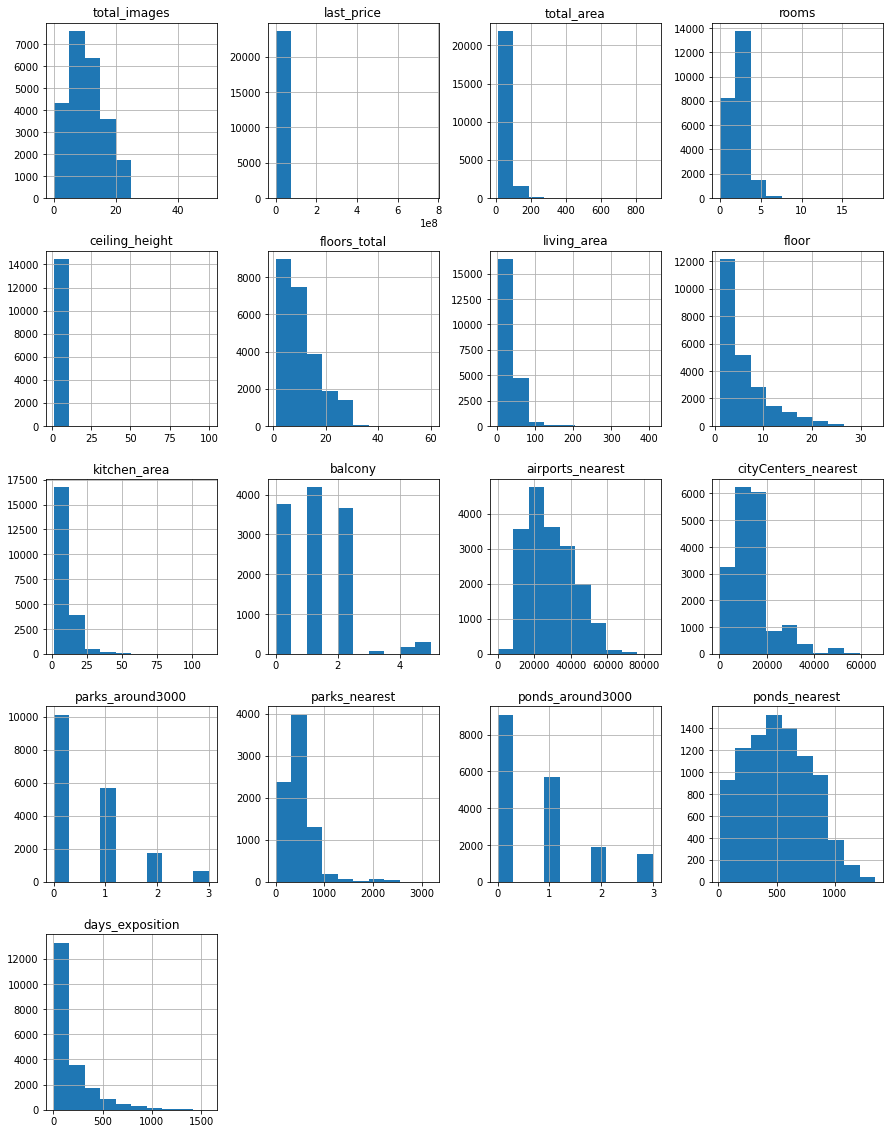

In [3]:
data.hist(figsize=(15, 20))

На первый взгляд у нас есть проблемы с некоторыми данными. Столбец с названиями поселков имеет дубликаты, большое количество пропусков в столбцах и непонятно большие значения. Так же есть столбцы с некорректным типом данных. В следующем разделе мы будем разбираться с ними и обрабатывать. 


<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Все библиотеки лучше импортировать отдельно в первой ячейке. Это позволит тебе в любой момент добавить ещё одну библиотеку без перезаписи переменных.
</div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Обрати внимание, что часть столбцов заменилась на "...". Чтобы это исправить, нужно увеличить максимальное количество отображающихся столбцов командой
			
	pd.set_option('display.max_columns', None)
</div>

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Здесь необходимо написать короткий вывод о проблемах с данными (пропуски, дубликаты, неверный тип данных, странные значения и т.д.)
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Правка выполнена 👍
</div>

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Не выполнено задание 1.3:   
<br>Постройте общую гистограмму для всех столбцов таблицы. Например, для датафрейма data это можно сделать командой data.hist(figsize=(15, 20)).
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b> 
<br>Графики построено верно! 
</div>
															
<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v2:</b> 
<br>Если после кода вызывающего график добавить ";", то мы избавимся от строчки над графиком)

	data.hist(figsize=(15, 20));
</div>

### Предобработка данных

Просмотрим тип данных в столбцах и количество ненулевых значений в них

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

- is_apartment - должен быть булев типа
- first_day_exposition - должен быть тип datetime
- floors_total, balcony, parks_around3000, ponds_around3000, days_exposition - данные столбцы должны быть типа int, тк могут быть только целочисленными. 

In [5]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

нашли количество пропусков по столбцам. в большинстве столбцов имеются пропуски. 

In [6]:

data['balcony'] = data['balcony'].fillna(0).astype('int') # заменим пропуски в столбце балконы, изменим тип на int
data['is_apartment'] = data['is_apartment'].fillna(False).astype('bool') #изменим тип на int тк он задан по условию, пропущенные значения заменим на False, тк скорее всего эти данные собираются недавно
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d') #изменим тип на datetime, и не будем указывать время, тк оно везде 00:00
data['last_price'] = data['last_price'].astype('int') #тк платят целыми рублями
data['last_price'] = data['last_price'] / 1000 # переведем стоимость квартир  в тысячи рублей, для удобства
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median()) 
data.info()
 df.loc[df['user_score'] == 'tbd', 'user_score'] = float('nan')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>floors_total - если мы заполняем таким способом, то нужно делать проверку, а не превышает ли этаж, на котором квартира общую этажность? Можно заменить на этаж квартиры либо оставить как есть
</div>

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Пропуски в столбцах с картографическими данными лучше не трогать. Заполняя их таким образом, ты проставляешь одинаковые расстояния до центра (парка, прудов, аэропорта) для разных квартир, хотя они могут быть расположены в разных частях города. Эти пропуски заполнять не нужно
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Правка выполнена 👍
</div>

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Давай ещё заполним пропуски в столбце с высотой потолков, тем более мы можем достаточно точно их восстановить так как основная часть данных в этом столбце находится в небольшом диапазоне.
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Правка выполнена 👍
</div>

Найдем уникальные значения в столбце с названиями

In [7]:
data['locality_name'].value_counts()


Санкт-Петербург                                            15721
посёлок Мурино                                               522
посёлок Шушары                                               440
Всеволожск                                                   398
Пушкин                                                       369
                                                           ...  
деревня Тойворово                                              1
поселок Рабитицы                                               1
садоводческое некоммерческое товарищество Лесная Поляна        1
деревня Хапо-Ое                                                1
садовое товарищество Новая Ропша                               1
Name: locality_name, Length: 364, dtype: int64

In [8]:
data['locality_name'] = data['locality_name'].str.replace('ё','е')
data['locality_name'] = data['locality_name'].str.replace('поселок Мурино','Мурино')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа Мурино','Мурино')
data['locality_name'] = data['locality_name'].str.replace('деревня Мурино','Мурино')
data['locality_name'] = data['locality_name'].str.replace('село Мурино','Мурино')
data['locality_name'] = data['locality_name'].str.replace('поселок Кудрово','Кудрово')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа Кудрово','Кудрово')
data['locality_name'] = data['locality_name'].str.replace('деревня Кудрово','Кудрово')
data['locality_name'] = data['locality_name'].str.replace('село Кудрово','Кудрово')
data['locality_name'] = data['locality_name'].str.replace('поселок Рябово','Рябово')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа Рябово','Рябово')
data['locality_name'] = data['locality_name'].str.replace('деревня Рябово','Рябово')
data['locality_name'] = data['locality_name'].str.replace('село Рябово','Рябово')
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Сланцы',
   

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Супер! Здесь всё верно)
</div>

In [9]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23613.000000,21796.000000,23699.000000,21421.000000,23699.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6541.548772,60.348651,2.070636,2.724358,10.673824,34.457852,5.892358,10.569807,0.591080,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,10887.013268,35.654083,1.078405,0.988298,6.597173,22.030445,4.885249,5.905438,0.959298,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,12.190000,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3400.000000,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4650.000000,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6800.000000,69.900000,3.000000,2.700000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,763000.000000,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [10]:
data.loc[(data['ceiling_height'] >= 10) , 'ceiling_height'] = data['ceiling_height'] / 10 # разделим значения, которые больше 10м на 10
data.loc[data['studio'] == True, 'rooms'] = 0
data.loc[data['studio'] == True, 'kitchen_area'] = 0


In [11]:
data = data[data.last_price < 150000] 
data['last_price'].sort_values(ascending = False).head(20) 
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23682 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23682 non-null  int64         
 1   last_price            23682 non-null  float64       
 2   total_area            23682 non-null  float64       
 3   first_day_exposition  23682 non-null  datetime64[ns]
 4   rooms                 23682 non-null  int64         
 5   ceiling_height        23682 non-null  float64       
 6   floors_total          23596 non-null  float64       
 7   living_area           21781 non-null  float64       
 8   floor                 23682 non-null  int64         
 9   is_apartment          23682 non-null  bool          
 10  studio                23682 non-null  bool          
 11  open_plan             23682 non-null  bool          
 12  kitchen_area          21556 non-null  float64       
 13  balcony         

Тут как я понял мы можем избавиться от слишком больших значений. Следовательно я убрал значения стоимости более 150млн рублей. Получилось, что чисто на цене мы убрали 17 слишком больших значений

In [12]:
data = data[data.rooms < 9] 
data['rooms'].sort_values(ascending = False).head(20)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23664 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23664 non-null  int64         
 1   last_price            23664 non-null  float64       
 2   total_area            23664 non-null  float64       
 3   first_day_exposition  23664 non-null  datetime64[ns]
 4   rooms                 23664 non-null  int64         
 5   ceiling_height        23664 non-null  float64       
 6   floors_total          23578 non-null  float64       
 7   living_area           21764 non-null  float64       
 8   floor                 23664 non-null  int64         
 9   is_apartment          23664 non-null  bool          
 10  studio                23664 non-null  bool          
 11  open_plan             23664 non-null  bool          
 12  kitchen_area          21539 non-null  float64       
 13  balcony         

аналогично убрал слишком большие значение. Оставил тольок значения меньше 9 комнат. убрал 18 строк. 

In [13]:
data = data[data.total_area < 250] 
data['total_area'].sort_values(ascending = False).head(20)
data.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 23572 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23572 non-null  int64         
 1   last_price            23572 non-null  float64       
 2   total_area            23572 non-null  float64       
 3   first_day_exposition  23572 non-null  datetime64[ns]
 4   rooms                 23572 non-null  int64         
 5   ceiling_height        23572 non-null  float64       
 6   floors_total          23487 non-null  float64       
 7   living_area           21688 non-null  float64       
 8   floor                 23572 non-null  int64         
 9   is_apartment          23572 non-null  bool          
 10  studio                23572 non-null  bool          
 11  open_plan             23572 non-null  bool          
 12  kitchen_area          21462 non-null  float64       
 13  balcony         

Тут оставил значения по площади меньше 250 квадратных метров. думаю, что 250 еще нормальное значение, выше уже перебор) Убрал 100 строк данным фильтром. Получается что отфильтровав значения площади квартиры, комнат и цены я убрал около 1 процента строк от общего количечства. 

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Давай детальнее изучим аномалии в некоторых столбцах. Аномальное значение не значит, что оно нереальное или не может существовать. Это значит, что такое значение выделяется на общем фоне и встретить его большая редкость. Посмотри какие значения есть в столбцах со стоимостью квартиры, количеством комнат и общей площадью. Кажется, в них есть значения, которые сильно выделяются на общем фоне (слишком высокие). Не забудь проверить какое количество данных мы в итоге отбрасываем. Это количество не должно превышать 10% от изначального объёма данных. C этим может помочь следующий код

	new_data.shape[0] / old_data.shape[0]
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Ты всё сделал верно, но давай на всякий случай я покажу как правильно находить границу для аномальных значений. Давай разберём на примере общей площади (график ниже). На графике чётко видно, что после 200м квартир практически нет, а после 300 линии даже не видно. В данном случае аномальными значениями можно считать все квартиры больше 200-300м. Значит эти значения нужно отбросить. Удали аномалии в этих столбцах
</div>


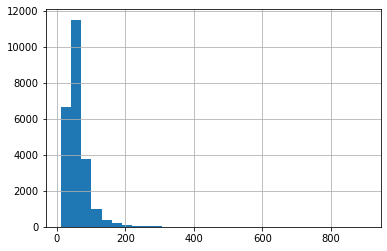

In [53]:
#код ревьюера
data2 = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
(data2['total_area']).hist(bins=30);

### Посчитайте и добавьте в таблицу новые столбцы

In [14]:
data['cost_1m2'] = data['last_price'] / data['total_area'] # цена за квадратный метр
data['cost_1m2']

0        120.370370
1         82.920792
2         92.785714
3        408.176101
4        100.000000
            ...    
23694     72.490845
23695     52.542373
23696     44.091711
23697    149.511401
23698     41.795666
Name: cost_1m2, Length: 23572, dtype: float64

In [15]:
data['day_number'] = data['first_day_exposition'].dt.weekday
data.head()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_1m2,day_number
0,20,13000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120.370370,3
1,7,3350.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82.920792,1
2,10,5196.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92.785714,3
3,0,64900.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408.176101,4
4,2,10000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100.000000,1


In [16]:
data['week_number'] = data['first_day_exposition'].dt.week
data.head()

/tmp/ipykernel_247/4282007182.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  data['week_number'] = data['first_day_exposition'].dt.week


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_1m2,day_number,week_number
0,20,13000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120.370370,3,10
1,7,3350.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82.920792,1,49
2,10,5196.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92.785714,3,34
3,0,64900.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408.176101,4,30
4,2,10000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100.000000,1,25


In [17]:
data['month_number'] = data['first_day_exposition'].dt.month
data.head()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_1m2,day_number,week_number,month_number
0,20,13000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120.370370,3,10,3
1,7,3350.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82.920792,1,49,12
2,10,5196.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92.785714,3,34,8
3,0,64900.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408.176101,4,30,7
4,2,10000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100.000000,1,25,6


In [18]:
data['year_number'] = data['first_day_exposition'].dt.year
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_1m2,day_number,week_number,month_number,year_number
0,20,13000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120.370370,3,10,3,2019
1,7,3350.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82.920792,1,49,12,2018
2,10,5196.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92.785714,3,34,8,2015
3,0,64900.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408.176101,4,30,7,2015
4,2,10000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100.000000,1,25,6,2018


In [19]:
def floor_number(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_number'] = data[['floor', 'floors_total']].apply(floor_number, axis = 1)
data.head()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_1m2,day_number,week_number,month_number,year_number,floor_number
0,20,13000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120.370370,3,10,3,2019,другой
1,7,3350.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82.920792,1,49,12,2018,первый
2,10,5196.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92.785714,3,34,8,2015,другой
3,0,64900.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408.176101,4,30,7,2015,другой
4,2,10000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100.000000,1,25,6,2018,другой


In [20]:
data['cityCentr_km'] = round(data['cityCenters_nearest'] / 1000)
data['cityCentr_km'].head(20)

results = st.ttest_ind(
    platform_actual[(platform_actual.platform == "XOne") & (platform_actual.user_score]['user_score'], 
    platform_actual[(platform_actual.platform == "PC") & (platform_actual.user_score]['user_score']
)

0     16.0
1     19.0
2     14.0
3      7.0
4      8.0
5      NaN
6     19.0
7     12.0
8      NaN
9     15.0
10    14.0
11    52.0
12     NaN
13    33.0
14    31.0
15    14.0
16    11.0
17    15.0
18    11.0
19    13.0
Name: cityCentr_km, dtype: float64

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Все необходимые колонки добавлены. Идём дальше)
</div>

### Проведите исследовательский анализ данных

count    23572.000000
mean        58.880627
std         28.581084
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        249.700000
Name: total_area, dtype: float64

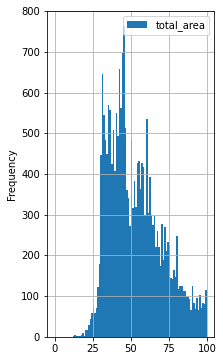

In [21]:
data.plot(y = 'total_area', kind = 'hist', bins = 100, grid = True, figsize = (3,6), range = (0,100))
data['total_area'].describe()




В принципе неплохие данные. Малое количество вбросов или неккоректных данных. Они не особо влияют на распределение. Средяя площадь - 58 квадратных метров, а медианное значение - 52. 

count    21688.000000
mean        33.697230
std         18.718728
min          2.000000
25%         18.600000
50%         30.000000
75%         42.000000
max        200.000000
Name: living_area, dtype: float64

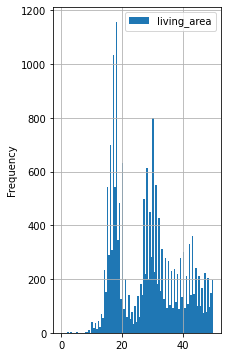

In [22]:
data.plot(y = 'living_area', kind = 'hist', bins = 100, grid = True, figsize = (3,6), range = (0,50))
data['living_area'].describe()


Убрав значения аномальные, у нас чуть изменилась средняя площадь. Но с другой стороны есть вероятность, что это не вбросы, а элитное жилье с большой площадью. Данные так же нормальные, средняя площадь 33, медианное значение 30. 

count    21462.000000
mean        10.382512
std          5.590492
min          0.000000
25%          7.000000
50%          9.000000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

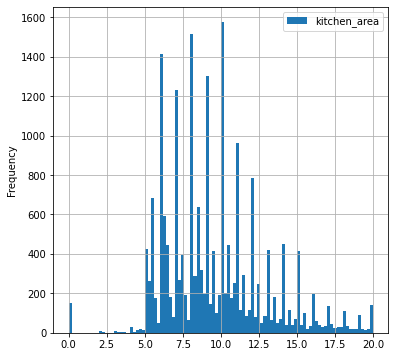

In [23]:
data.plot(y = 'kitchen_area', kind = 'hist', bins = 100, grid = True, figsize = (6,6), range = (0,20))
data['kitchen_area'].describe()

тут видим минимальное значение равное 0. Это квартиры студии, в которых нет кухни, тем самым площадь кухни равна 0. Среднее и медианное значение равно 10 и 9 квадратных метров соотвественно. Опять же есть выбросы в 90-112 квадратных метров. Так же думаю, что это вполне возможно в каких-либо элитных ЖК, либо старых домах. Есть так же веротность, что имеются квартиры с верандами (как мангальные зоны на улице) , выходящими на улицу. Они так же могут считаться как доп квадратные метры к кухне. 

count     23572.000000
mean       6139.879701
std        6231.683068
min          12.190000
25%        3400.000000
50%        4600.000000
75%        6700.000000
max      140000.000000
Name: last_price, dtype: float64

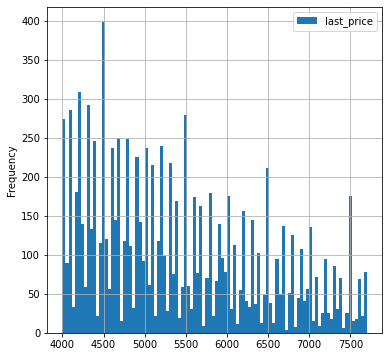

In [24]:
data.plot(y = 'last_price', kind = 'hist', bins = 100, grid = True, figsize = (6,6), range = (4000,7700))
data['last_price'].describe()

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Тут можно было бы делить сразу на 1млн)
</div>

Тут уже разница между медианным и средним значением велика из-за выбивающихся значений в 36+млн. Тут очевидно, что такие будут, тк близость к центру, количество комнат и тд. влияют на стоимость. 

count    23572.000000
mean         2.047811
std          1.017915
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: rooms, dtype: float64

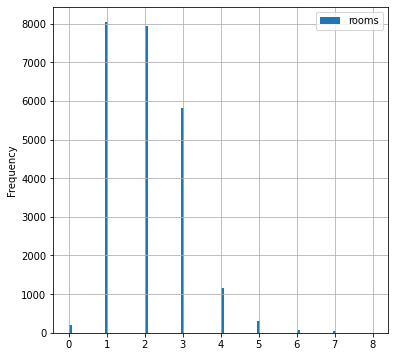

In [25]:
data.plot(y = 'rooms', kind = 'hist', bins = 100, grid = True, figsize = (6,6), range = (0,8))
data['rooms'].describe()

Распределение так же вполне ожидаемо. Среднее и медианное значение = 2 комнаты. Есть выбивающиеся единичные  значения , где количество комнат более 10 ( но мы их убрали). 

count    23572.000000
mean         2.695277
std          0.231544
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         10.000000
Name: ceiling_height, dtype: float64

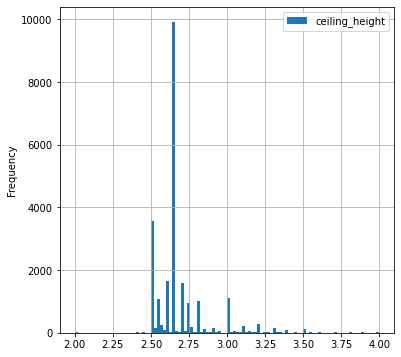

In [26]:
data.plot(y = 'ceiling_height', kind = 'hist', bins = 100, grid = True, figsize = (6,6), range = (2,4))
data['ceiling_height'].describe()


In [27]:
data.query('ceiling_height == 10')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_1m2,day_number,week_number,month_number,year_number,floor_number,cityCentr_km
22869,0,15000.0,25.0,2018-07-25,1,10.0,5.0,14.0,5,True,False,False,11.0,5,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0,600.0,2,30,7,2018,последний,8.0


Выбросы имеются, но не влияют на данные. Средняя 2.69, медианное значение 2.65. Есть показатели высоты потолка 10м, вполне возможно что здания под какие-то музеи, коммерческая недвижимость. 

count    23572.000000
mean         5.895512
std          4.889321
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

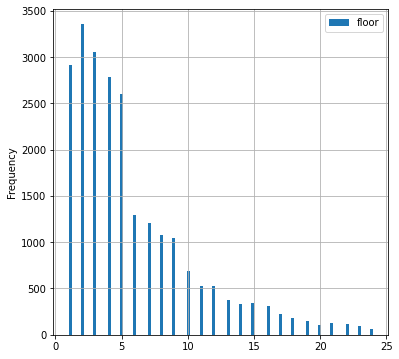

In [28]:
data.plot(y = 'floor', kind = 'hist', bins = 100, grid = True, figsize = (6,6), range = (1,24))
data['floor'].describe()


In [29]:
data['floors_total'].value_counts(ascending = True)

60.0       1
33.0       1
37.0       1
29.0       1
34.0       1
52.0       1
36.0       3
28.0      21
35.0      24
1.0       25
26.0     124
21.0     158
27.0     164
11.0     203
13.0     228
20.0     269
22.0     286
19.0     338
23.0     352
15.0     365
2.0      379
8.0      381
24.0     469
18.0     504
14.0     553
7.0      578
3.0      655
17.0     829
6.0      893
25.0    1074
10.0    1173
4.0     1183
12.0    1359
16.0    1375
9.0     3756
5.0     5760
Name: floors_total, dtype: int64

По гистограмме видим, что преобладают 1-4 этажи. Это свяазанно с тем, что преобладают пятиэтажки (основываясь на данные выше). 

In [30]:
data['floor_number'].value_counts()


другой       17375
последний     3289
первый        2908
Name: floor_number, dtype: int64

Ну тут из данный можно понять, что люди не берут 1 и последний этаж. Думаю это аргументируется тем, что на 1 этаже все видно через окна, а последний этаж - это плохо, когда допустим выключается лифт. + люди думаю на старость. На последнем этаже будет тяжело жить в старости

count    23487.000000
mean        10.695278
std          6.601432
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

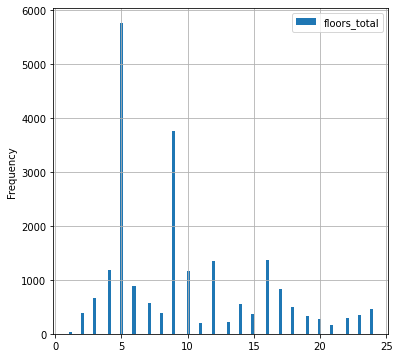

In [31]:
data.plot(y = 'floors_total', kind = 'hist', bins = 100, grid = True, figsize = (6,6), range = (1,24))
data['floors_total'].describe()

In [32]:
data.query('floors_total == 60')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_1m2,day_number,week_number,month_number,year_number,floor_number,cityCentr_km
2253,12,3800.0,45.5,2018-06-28,2,2.88,60.0,27.4,4,False,False,False,7.4,0,Кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166.0,83.516484,3,26,6,2018,другой,49.0


Как и говорил ранее по этажу продоваемой квартиры можно увидеть, что преобладает 1-4 этаж. Это напрямую связанно с тем, что в анализируемых районах преобладают пятиэтажные дома. Есть выброс с 60-этажным домом. Это выброс, так вряд ли в 50км от центра будет дом в 60 этажей ( но мы их опять же убрали)

count    18055.000000
mean     14242.196788
std       8602.951358
min        181.000000
25%       9329.000000
50%      13141.000000
75%      16316.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

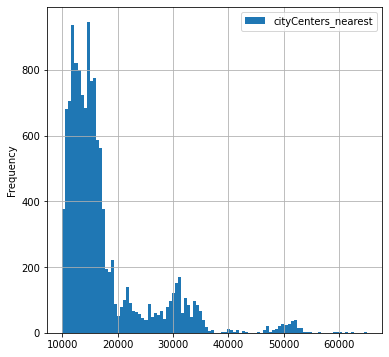

In [33]:
data.plot(y = 'cityCenters_nearest', kind = 'hist', bins = 100, grid = True, figsize = (6,6), range = (10000,65000))
data['cityCenters_nearest'].describe()

По данным видно, что большинство продаваемых квартир в данном датафрейме расположенны в 13-15км от центра города. Так же присутствуют квартиры и в области, у которых расстояние до центра 40+ км. 

count    18034.000000
mean     28806.877565
std      12656.773835
min          0.000000
25%      18551.000000
50%      26765.000000
75%      37310.000000
max      84869.000000
Name: airports_nearest, dtype: float64

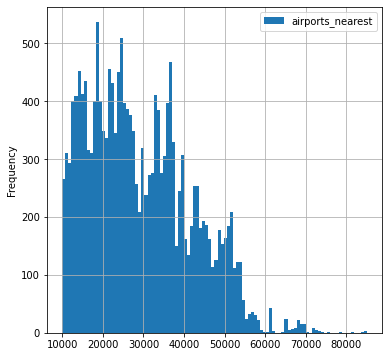

In [34]:
data.plot(y = 'airports_nearest', kind = 'hist', bins = 100, grid = True, figsize = (6,6), range = (10000,85000))
data['airports_nearest'].describe()

В среднем аэропорт расположен в 25км от продаваемых квартир. Думаю, что вряд ли люди, покупающие себе квартиру смотрят на этот показатель. ( Расстояние в 85км скорее всего это другой конец области от аэропорта)

count    7998.000000
mean      491.693923
std       342.898129
min         1.000000
25%       288.000000
50%       455.000000
75%       613.000000
max      3190.000000
Name: parks_nearest, dtype: float64

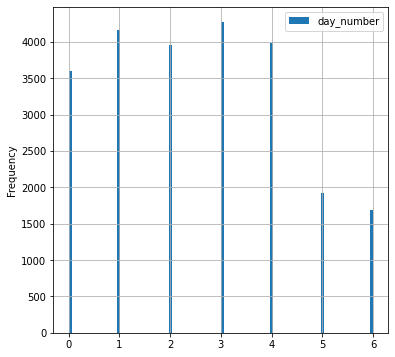

In [35]:
data.plot(y = 'day_number', kind = 'hist', bins = 100, grid = True, figsize = (6,6), range = (0,6))
data['parks_nearest'].describe()

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Поправь range
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Правка выполнена 👍
</div>

count    7998.000000
mean      491.693923
std       342.898129
min         1.000000
25%       288.000000
50%       455.000000
75%       613.000000
max      3190.000000
Name: parks_nearest, dtype: float64

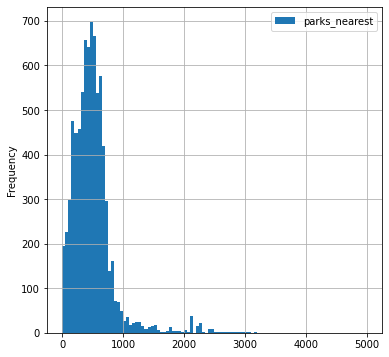

In [36]:
data.plot(y = 'parks_nearest', kind = 'hist', bins = 100, grid = True, figsize = (6,6), range = (0,5000))
data['parks_nearest'].describe()

Условно говоря от каждой продаваемой квартиры в шаговой доступности (400-500м) имеется парк. Неплохой показатель , тк люди смотрят инфраструктуру рядом с приобретаемым жильем. 

Чаще всего люди выставляют объявления в четверг. Думаю, что выставляя в четверг люди расчитывают, что на выходных покупатели будут смотреть объявления. 
Обычно на площадках есть проверка объявления и тд, поэтому выставляя в четверг, как раз на выходных объявление будет выше и его посмотрит больше людей

2     2630
3     2570
4     2365
11    2360
10    2117
9     1968
6     1752
8     1741
7     1681
12    1631
1     1489
5     1268
Name: month_number, dtype: int64

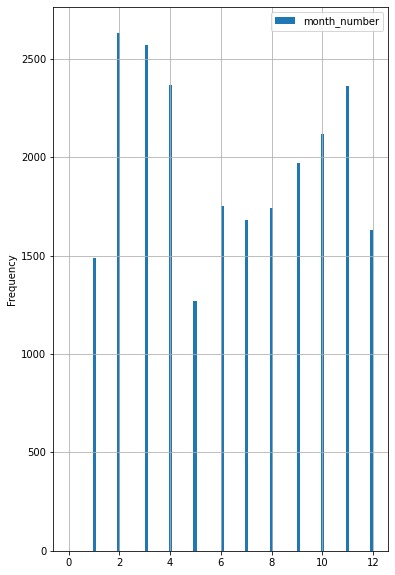

In [37]:
data.plot(y = 'month_number', kind = 'hist', bins = 100, grid = True, figsize = (6,10), range = (0,12))
data['month_number'].value_counts()

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Тут оптимальный range 12
</div>

По графику видно, что самыми популярными месяцами являются февраль-март-апрель, и предновогодний период.

#  Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление. 

count    20418.000000
mean       180.304878
std        219.070031
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

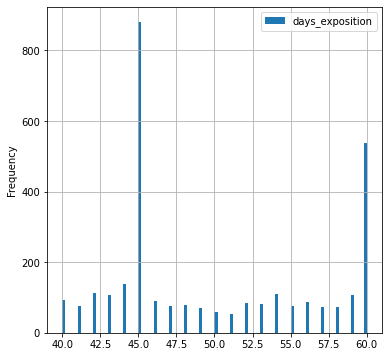

In [38]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, figsize = (6,6), range = (40,60))
data['days_exposition'].describe()

In [39]:
data['days_exposition'].value_counts()

45.0      880
60.0      538
7.0       234
30.0      207
90.0      198
         ... 
969.0       1
1147.0      1
1148.0      1
1345.0      1
1174.0      1
Name: days_exposition, Length: 1138, dtype: int64

Среднее время продажи квартиры - 181 день - полгода. А медианное значения - 91 день - 3 месяца. На это влияют очень долго-продаваемые квратиры - 1000 дней и больше. Есть пик по продажам на 45 и 60 день - вероятнее всего на площадке автоматически снимаются объявления после 45 и 60 дня и они засчитываются как проданные. 

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Здорово, что ты заметил эти всплески! Это действительно особенность функционирования системы размещения объявлений. Убедиться в этом можно по ссылке ниже

	https://yandex.ru/support/realty/owner/home/add-ads-housing.html
</div>

# Какие факторы больше всего влияют на общую (полную) стоимость объекта? 
Изучите, зависит ли цена от:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.

0.7212303257222062

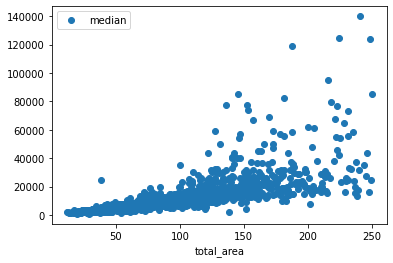

In [40]:

area_price = data.pivot_table(index = 'total_area', values = 'last_price', aggfunc = ['mean',  'median'])
area_price.columns = ['mean', 'median']
area_price.plot(y = 'median', style = 'o')

area_price.sort_values('median', ascending = False)

data['total_area'].corr(data['last_price'])


Корреляция равна 0.6. Поэтому можно сделать вывод, что зависимость между общей площадью и стоимостью есть, но не велика. Чем больше площадь, тем чуть-чуть дороже  
Вот после того, как убрал слишком большие значения корреляция увеличилась (0.7) и уже видно, что цена зависит от площади. Чем больше площадь, больше цена!

0.6215927377271913

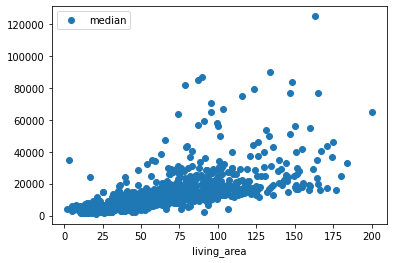

In [41]:

liv_price = data.pivot_table(index = 'living_area', values = 'last_price', aggfunc = ['mean',  'median'])
liv_price.columns = ['mean', 'median']
liv_price.plot(y = 'median', style = 'o')

liv_price.sort_values('median', ascending = False)

data['living_area'].corr(data['last_price'])


 platform_release = games_after94.pivot_table(index='platform', 
                                      values='total_sales', 
                                      columns = 'year_of_release', 
                                      aggfunc = 'count', 
                                      fill_value=0, 
                                      margins=True).reset_index()

Корреляция равна 0.5. Поэтому можно сделать вывод, что зависимость между жилой площадью и стоимостью мала. Чем больше жилая площадь, тем чуть дороже  
Так же после того, как убрал значения большие, корреляция увеличилась (0.6) и опять же видим зависимость цены от жилой площади))

0.5663941276706946

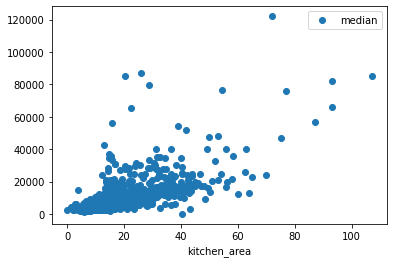

In [42]:
kitch_price = data.pivot_table(index = 'kitchen_area', values = 'last_price', aggfunc = ['mean',  'median'])
kitch_price.columns = ['mean', 'median']
kitch_price.plot(y = 'median', style = 'o')

kitch_price.sort_values('median', ascending = False)

data['kitchen_area'].corr(data['last_price'])

Корреляция опять же не высока. Площадь кухни имеет влияние на цену, но не сильное  

Чудо, после изменений корреляция почти 0.6. Так же стоимость зависит и от площади кухни. 

0.43193415405262325

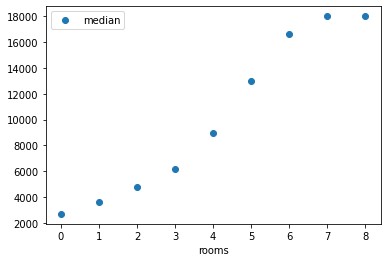

In [43]:
room_price = data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['mean',  'median'])
room_price.columns = ['mean', 'median']
room_price.plot(y = 'median', style = 'o')

room_price.sort_values('median', ascending = False)

data['rooms'].corr(data['last_price'])

Корреляция опять же не высока. Количество комнат имеет влияние на цену, но не сильное.

Тут тоже выросла, но не такая сильная как в предыдущих пунктах)

,mean,median
floor_number,,
другой,6409.369916,4800.0
последний,5992.645918,4300.0
первый,4696.227507,3900.0


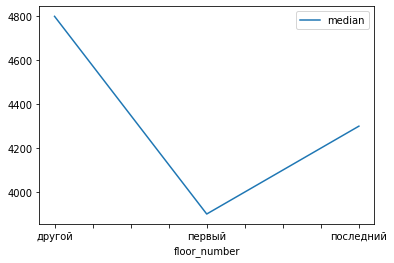

In [44]:
floor_price = data.pivot_table(index = 'floor_number', values = 'last_price', aggfunc = ['mean',  'median'])
floor_price.columns = ['mean', 'median']
floor_price.plot(y = 'median')

floor_price.sort_values('median', ascending = False)



Согласно графику  дешевле квартиры на первом и последнем этаже. 

# зависимость от дня недели, месца, года

<AxesSubplot:xlabel='day_number'>

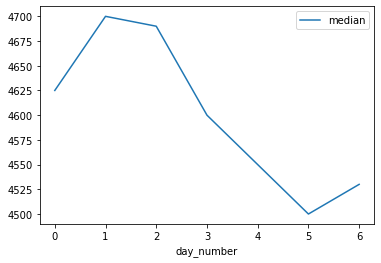

In [45]:
day_price = data.pivot_table(index = 'day_number', values = 'last_price', aggfunc = ['mean',  'median'])
day_price.columns = ['mean',  'median']
day_price.plot(y = 'median')



По графику видно, что пик цены приходится на объявления выставленные во вторник. Вероятнее всего после выходных люди более активны и это отражается и на стоимости.  

<AxesSubplot:xlabel='month_number'>

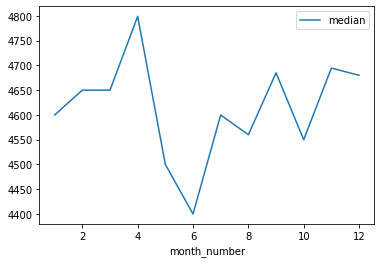

In [46]:
month_price = data.pivot_table(index = 'month_number', values = 'last_price', aggfunc = ['mean',  'median'])
month_price.columns = ['mean',  'median']
month_price.plot(y = 'median')

На графике видно, что стоимость ниже всего в июне. Скорее всего стоимость летом меньше - тк летом у многих отпуска, дача и людям не до покупки квартиры. Следовательно продавцы снижают цены на квартиры. Пик цен в весенний и предновогодний сезон. Такие же данные мы получили по дате публикации объявлений. 

<AxesSubplot:xlabel='year_number'>

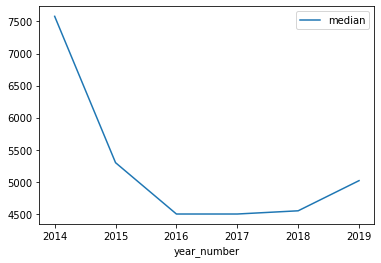

In [47]:
year_price = data.pivot_table(index = 'year_number', values = 'last_price', aggfunc = ['mean',  'median'])
year_price.columns = ['mean',  'median']
year_price.plot(y = 'median')

Видим, что квартиры с 2014 года начали дешеветь. с 2016 по 2018 цены держались. Вероятнее всего это было связанно с подъемом курса доллара после 2014 года. Люди продавали квартиры, покупали доллары. А может просто уезжали. 

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Зависимость цены изучена верно! Ещё тут можно использовать для визуализации pairplot из библиотеки seaborn 
    
    https://seaborn.pydata.org/generated/seaborn.pairplot.html
</div>

#### Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.

In [48]:
pivot_table = data.pivot_table(index = 'locality_name', values = 'cost_1m2', aggfunc=['count', 'mean'])
pivot_table.columns = ['count', 'mean'] 
pivot_table = pivot_table.sort_values('count', ascending = False).head(10)
pivot_table 


,count,mean
locality_name,,
Санкт-Петербург,15598,113.756543
Мурино,590,86.087512
Кудрово,472,95.324931
поселок Шушары,440,78.677364
Всеволожск,398,68.654474
Пушкин,367,103.130852
Колпино,337,75.333296
поселок Парголово,327,90.175913
Гатчина,307,68.746147


In [49]:
import seaborn
kek = data.query('locality_name == "Санкт-Петербург"')
kek['cost_1m2'].mean()


113.75654295756922

Самая дорогая недвижимость по количеству объявлений , как и ожидалось, в Санкт-Петербурге. Самая дешевая недвижимость по количеству объявлений - Выборг.  

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Всё верно! Как вариант, тут можно построить барплот для топ10 по средней цене, так будет более наглядно)
</div>

### Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

<AxesSubplot:xlabel='cityCentr_km'>

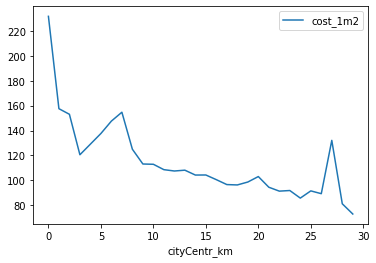

In [50]:
pivot_km_SP = data.query('locality_name == "Санкт-Петербург" ').pivot_table(index = 'cityCentr_km', values = 'cost_1m2', aggfunc = 'mean')
pivot_km_SP.plot()



    Естественно видно, что чем ближе к центру, тем цена за квадратный метр больше. Центром питера считается примерно 6 км. 

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Верно 👍
</div>

# Вывод

Мы обработали полученнный ДатаФрейм - обработали пропущенные значения в столбцах,где есть пропуски, заполнили эти значения, где это было возможно. Изменили типы данных в столбцах, где это было необходимо сделать. Убрали неявные дубликаты в названии населенных пунктов. Устранили выбивающиеся значения в столбцах. Добавили в датафрейм столбцы с ценой одного квадратного метра, днем, месяцем и годом публикации, типа этажа квартиры(первый, другой, последний),округленное расстояние до центра города в КМ. 
Провели анализ стобцов на наличие выбросов в них. Нашли средние и медианные значения данных столбцов. 
Изучили среднюю время продажи и нашли выброс в том, что после 45 или 60 дней на платформе объявление снимается автоматически. Следственно объявление считается проданным и делает выброс в среднее время продажи. Об этом надо сообщить разработчикам , чтобы они добавили отдельный столбец с булевым типом( True- человек снял сам, а значит продал,  False - объявление снято автоматически программой).
Провели анализ зависимости стоимости от 
общей площади;
жилой площади;
площади кухни;
количества комнат;
этажа, на котором расположена квартира (первый, последний, другой);
даты размещения (день недели, месяц, год). 
По итогу итоговая стоимость больше всего зависит от общей площади, жилой площади, этажа квартиры и площади кухни. 
Провели анализ по 10 самым популярным населенным пунктам по количеству объявлений и стоимости квадратного метра. Самая дорогая недвижимость по количеству объявлений , как и ожидалось, в Санкт-Петербурге. Самая дешевая недвижимость по количеству объявлений - Выборг.
Расчитали среднюю стоимость квадратного метра в зависимости от расстояния до центра. Ествественно тут есть зависимость и чем ближе к центру , тем дороже квадратный метр. По нашим расчетам центр питера иметт длину примерно 6 км. 
Так же выявили, что квартиры летом дешевеют, а весной цены повышаются. Больше всего люди выставляют объявления в весенний и предновогодний период. 

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>После всех внесённых правок, обязательно перепроверь общий вывод и промежуточные выводы и поправь их по необходимости
</div>

<div class="alert alert-danger">
<b>❌ Итоговый комментарий ревьюера v1:</b> 
<br>Ты хорошо потрудился, большая часть работы сделана, но остаётся внести следующие правки:
<br>- написать короткий вывод после первичного просмотра данных
<br>- выполнить задание 1.3
<br>- не заполнять пропуски в столбцах с картографическими данными	
<br>- не заполнять пропуски в столбце days_exposition
<br>- отбросить аномальные значения 
<br>- поправить график для столбца c днем недели
<br>- поправить выводы там, где это необходимо
</div>

<div class="alert alert-success">
<b>✔️ Итоговый комментарий ревьюера v2:</b>
<br>Все правки выполнены. Молодец!
<br>Проделана огромная работа! У тебя подробные, понятные и логичные выводы, которые ты подкрепляешь фактами. Были использованы разные графики и способы, чтобы как можно более тщательно изучить данные и у тебя это получилось! 
<br>Я рад был поработать над проверкой твоей работы) В качестве дополнительного материала для изучения могу порекомендовать следующий ресурс:

	https://www.python-graph-gallery.com/
<br>В нем содержится большая библиотека графиков с готовым кодом, который можно использовать при работе.
<br>Поздравляю со сдачей проекта и желаю удачи в дальнейшем обучении! 😉    
</div>

- [x]  открыт файл
- [ ]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [ ]  определены пропущенные значения
- [ ]  заполнены пропущенные значения там, где это возможно
- [ ]  есть пояснение, какие пропущенные значения обнаружены
- [ ]  изменены типы данных
- [ ]  есть пояснение, в каких столбцах изменены типы и почему
- [ ]  устранены неявные дубликаты в названиях населённых пунктов
- [ ]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [ ]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [ ]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [ ]  посчитано и добавлено в таблицу: месяц публикации объявления
- [ ]  посчитано и добавлено в таблицу: год публикации объявления
- [ ]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [ ]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [ ]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [ ]  построены гистограммы для каждого параметра
- [ ]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [ ]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [ ]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [ ]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [ ]  в каждом этапе есть промежуточные выводы
- [ ]  есть общий вывод

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.